# Load the libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

# Read the image

(330, 330, 3)


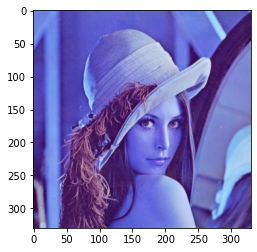

In [2]:
#Read the image
img = cv2.imread("Lenna.png")
print(img.shape)
plt.imshow(img,'viridis')

# Convert the color image into Gray scale image

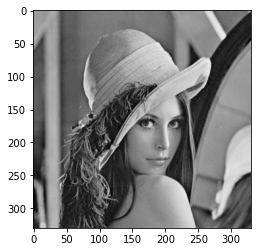

In [3]:
#Convert the image into Gray Scale
gray_img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,"gray")


# Apply different threshold methods

In [4]:
# Setting parameter values
t_lower = 50  # Lower Threshold
t_upper = 100  # Upper threshold
  
# Blur the image to reduce the noise
#blur_img = cv2.GaussianBlur(gray_img,(5,5),cv2.BORDER_DEFAULT)
blur_img = cv2.medianBlur(gray_img,7)

#Differt Thresholod methods
canny_edge = cv2.Canny(blur_img, t_lower, t_upper) #Canny Edge
ret ,simple_threshold = cv2.threshold(blur_img,127,255,cv2.THRESH_BINARY) # Simple Threshold
adap_threshold_gaussian = cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2) #Adaptive Threshold - Gaussian
adap_threshold_mean = cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,2) #Adaptive Threshold - Mean
ret2,otsu_threshold = cv2.threshold(blur_img,0,255,cv2.THRESH_OTSU)
 


#plt.imshow(canny_edge,"gray")
  

# Plot all the images

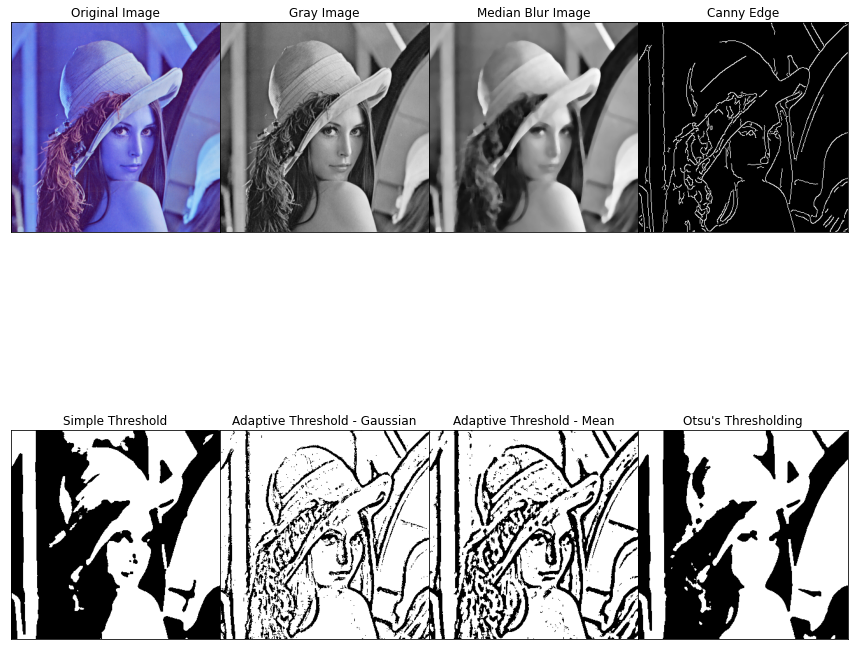

In [5]:
images = [img,gray_img,blur_img,canny_edge,simple_threshold,adap_threshold_gaussian,adap_threshold_mean,otsu_threshold]
titles = ['Original Image', 'Gray Image','Median Blur Image','Canny Edge',
          'Simple Threshold','Adaptive Threshold - Gaussian',"Adaptive Threshold - Mean","Otsu's Thresholding"]

plt.figure(figsize = (15,15))
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(8):
    plt.subplot(2,4,i+1),
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


# Apply edge detection result as a mask to give color to all the edges

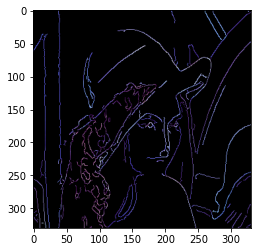

In [6]:
import numpy as np
import numpy.ma as ma
masked_img = cv2.cvtColor(canny_edge, cv2.COLOR_GRAY2RGB)
pos_index = np.where((masked_img == [255,255,255]).all(axis=2))
masked_img[pos_index] = img[pos_index]
plt.imshow(masked_img,'viridis')
